# CNN Klassifikator mit keras 

von Eric Hirsch und Jonas Morsch 

In [60]:
import os
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix



import cv2
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt

import Data_preparation as DP
DP = DP.Data_preparation()


from sklearn.preprocessing import LabelEncoder
import numpy as np

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Die Bilder laden 

In [70]:
Images,Labels = DP.create_Image_dataset("BIG_Bilder/",100,100)
Images_train,Images_test,Labels_train,Labels_test= DP.split_Image_data(Images,Labels,0.8)

In [71]:
#Die Daten in ein numpy Array umwandeln 
Images_train=np.asarray(Images_train)
Images_test=np.asarray(Images_test)

### Übersicht über die Testdaten

In [72]:
print("Shape Trainingsdaten: {}".format(Images_train.shape))
print("Shape Testdaten: {}".format(Images_test.shape))
print("Dimension Bild Nr. 5: {}".format(Images_train[5].shape))
print("Label zu Bild Nr. 5 {}".format(Labels_train[5]))
cv2.namedWindow("open33", cv2.WINDOW_NORMAL)
cv2.imshow('open33',Images[10])
cv2.waitKey()
cv2.destroyAllWindows()

Shape Trainingsdaten: (3864, 100, 100)
Shape Testdaten: (966, 100, 100)
Dimension Bild Nr. 5: (100, 100)
Label zu Bild Nr. 5 Korkenzieher


### Die Bilder reshapen und normalisieren 

In [73]:
len_Test_data=len(Images_test)
len_Train_data=len(Images_train)


train_images = Images_train.reshape(len_Train_data, 100, 100, 1)
train_images = train_images.astype('float32')
train_images /= 255

test_images = Images_test.reshape(len_Test_data, 100, 100, 1)
test_images = test_images.astype('float32')
test_images /= 255
      
Labels_test=np.array(Labels_test)
Labels_train=np.array(Labels_train)
label_encoder=LabelEncoder()
Labels_test=label_encoder.fit_transform(Labels_test)
Labels_train=label_encoder.fit_transform(Labels_train)

Labels_train=to_categorical(Labels_train)
Labels_test=to_categorical(Labels_test)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]







In [74]:
print("Trainingsdatensatz:{}".format(train_images.shape))
print("Testdatensatz:{}".format(test_images.shape))

print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages, NrTestimages))

Trainingsdatensatz:(3864, 100, 100, 1)
Testdatensatz:(966, 100, 100, 1)
Wir haben 3864 Trainingsbilder und 966 Testbilder.


### Ein Beispielbild anzeigen 

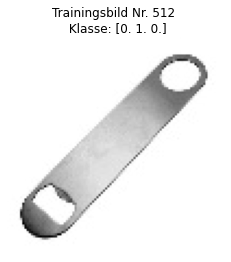

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

randindex = random.randint(0,len_Train_data)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex,Labels_train[randindex])
plt.imshow(train_images[randindex].reshape(100,100), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()


### CNN Model erzeugen 


In [76]:
# The Network architecture
model = Sequential()

# handle the format of the images to the input Layer
mnist_inputshape = train_images.shape[1:4]

# Kodierungsblock
model.add(Conv2D(32, kernel_size=(5,5), 
      activation = 'relu',
      input_shape=mnist_inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))
# Conv_Block 2
model.add(Conv2D(64, kernel_size=(5,5),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Prädiktionssblock
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',name='features'))
model.add(Dense(3,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 30976)            

### Das Modell compilen 

In [77]:

model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

### Das Modell trainieren 

In [78]:
# Hyperparameter
my_batch_size = 128
my_num_classes = 3
my_epochs = 5

history = model.fit(train_images, Labels_train,
      batch_size=my_batch_size,
      epochs=my_epochs,
      use_multiprocessing=False,
      verbose=1,
      validation_data=(test_images, Labels_test))


Epoch 1/5
31/31 [==============================] - 21s 666ms/step - loss: 1.0963 - accuracy: 0.3641 - val_loss: 1.1008 - val_accuracy: 0.3188
Epoch 2/5
31/31 [==============================] - 20s 663ms/step - loss: 1.0949 - accuracy: 0.3703 - val_loss: 1.1005 - val_accuracy: 0.3188
Epoch 3/5
31/31 [==============================] - 18s 593ms/step - loss: 1.0946 - accuracy: 0.3690 - val_loss: 1.1026 - val_accuracy: 0.3188
Epoch 4/5
31/31 [==============================] - 18s 586ms/step - loss: 1.0950 - accuracy: 0.3610 - val_loss: 1.1023 - val_accuracy: 0.3188
Epoch 5/5
31/31 [==============================] - 18s 579ms/step - loss: 1.0941 - accuracy: 0.3693 - val_loss: 1.1027 - val_accuracy: 0.3188


### Metrics Plotten

In [79]:

y_pred=model.predict(Images_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(Labels_test, axis=1)
print(classification_report(y_test,y_pred,zero_division=0))




              precision    recall  f1-score   support

           0       0.00      0.00      0.00       319
           1       0.00      0.00      0.00       308
           2       0.35      1.00      0.52       339

    accuracy                           0.35       966
   macro avg       0.12      0.33      0.17       966
weighted avg       0.12      0.35      0.18       966



In [80]:
score = model.evaluate(test_images, Labels_test)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])

31/31 [==============================] - 1s 35ms/step - loss: 1.1027 - accuracy: 0.3188
Test Verlust: 1.1026666164398193
Test Genauigkeit: 0.3188405930995941


### Ein einzelnes Bild trainiern 

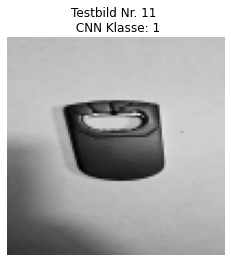

In [55]:
y_prediction = model.predict(Images_test)
randindex = random.randint(0,len(Images_test))
# Die Funktion argmax() liefert uns den index des höchsten Werts des Ergebnisvektors
CNN = y_prediction[randindex].argmax()
plttitle = "Testbild Nr. {} \n CNN Klasse: {}".format(randindex,CNN)
plt.imshow(test_images[randindex].reshape(100,100), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()

### Plotten der Genauigkeit und Lossfunktion

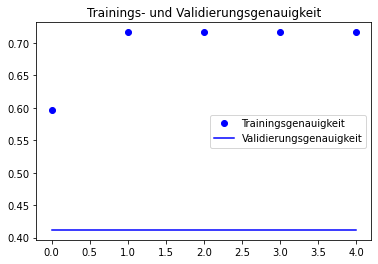

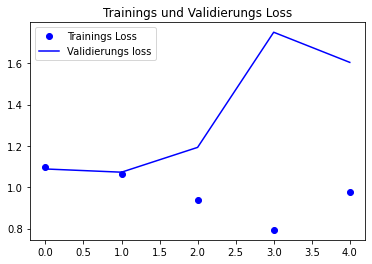

In [56]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Trainings Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs loss')
plt.title('Trainings und Validierungs Loss')
plt.legend()

plt.show()